In [44]:
import pandas as pd 
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import (
    silhouette_score, davies_bouldin_score,
    adjusted_rand_score, normalized_mutual_info_score)
from joblib import dump


In [45]:
df= pd.read_csv("wine.csv")
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [46]:
display(df.head())

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [47]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


None

In [48]:
display(df.describe())

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [49]:
# Cell 3 - Quick EDA
print("Columns:", df.columns.tolist())
print("\nDtypes:\n", df.dtypes)
print("\nMissing values per column:")
print(df.isna().sum())
print("\nBasic numeric summary:")
display(df.describe().T)

Columns: ['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols', 'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue', 'Dilution', 'Proline']

Dtypes:
 Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

Missing values per column:
Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

Basic numeric summary:


,count,mean,std,min,25%,50%,75%,max
Type,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoids,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


Numeric columns: ['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols', 'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue', 'Dilution', 'Proline']


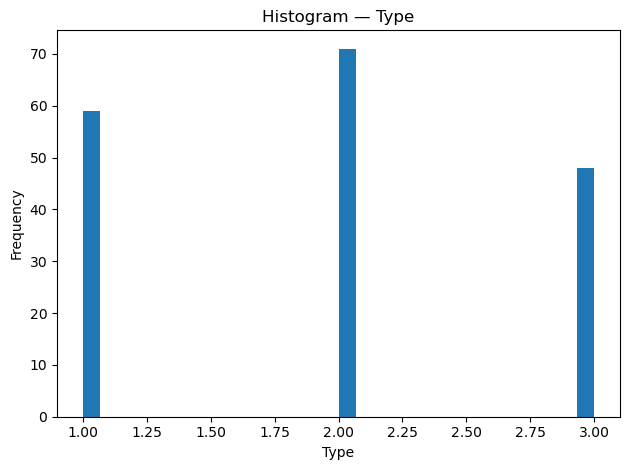

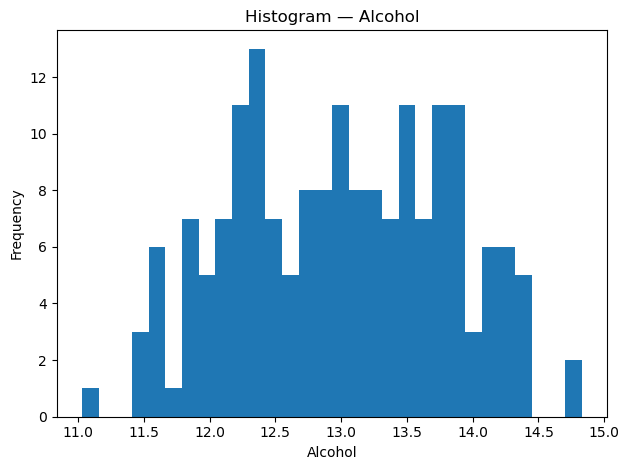

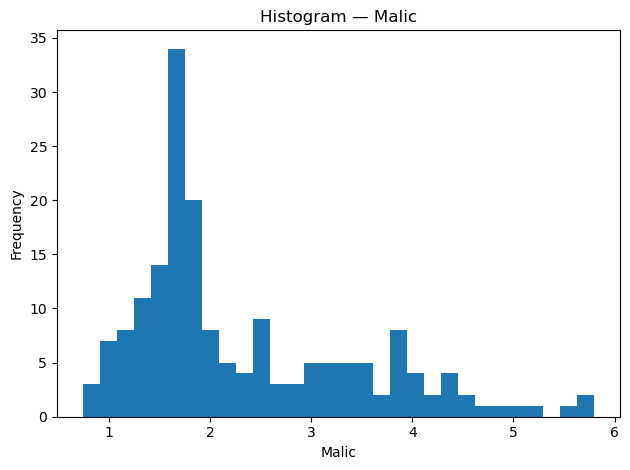

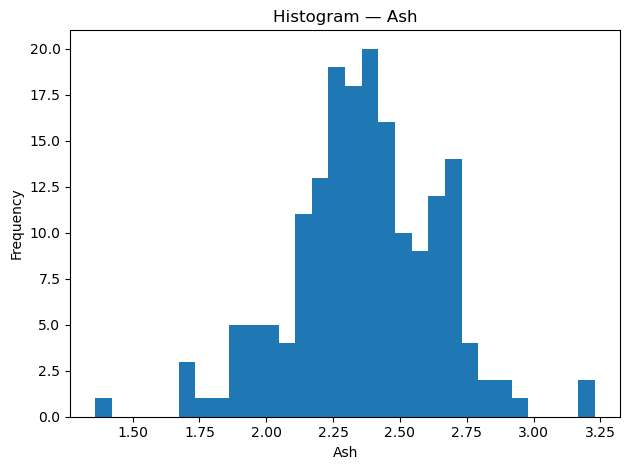

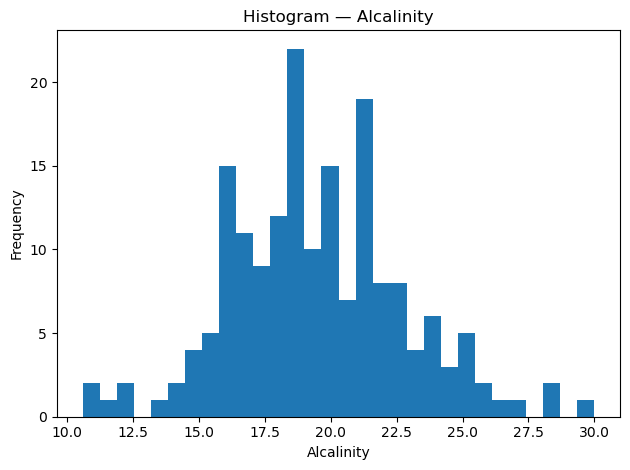

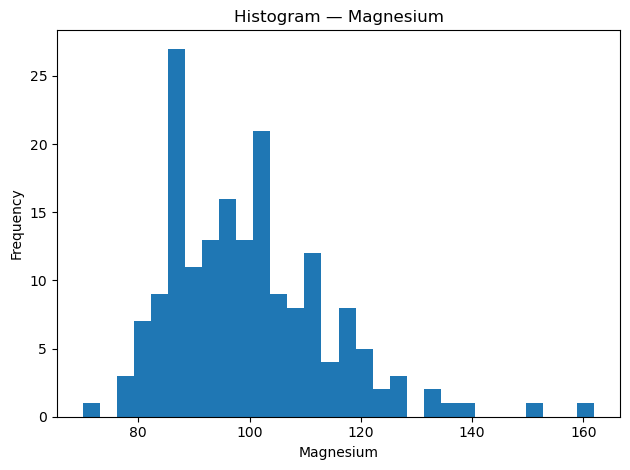

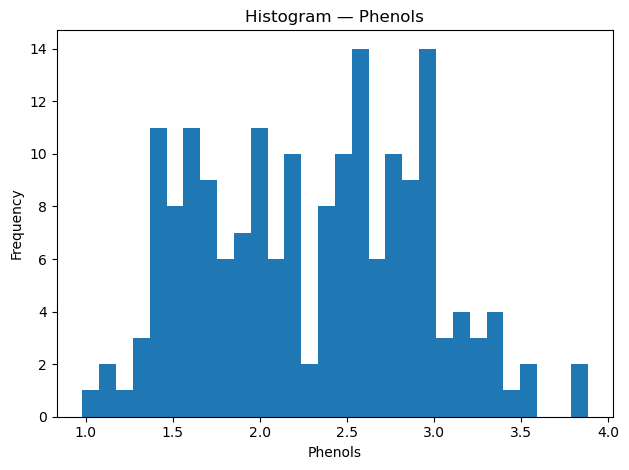

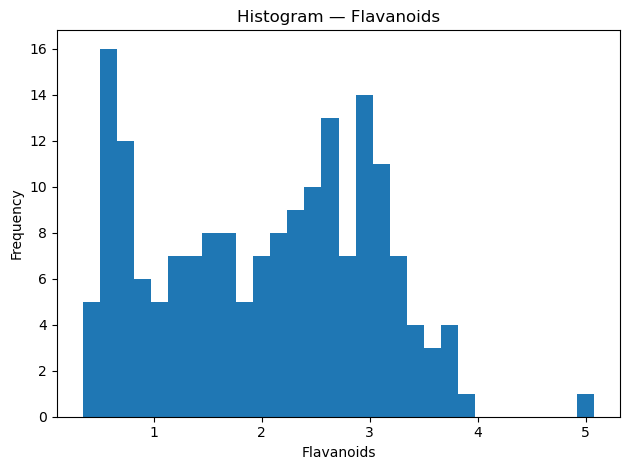

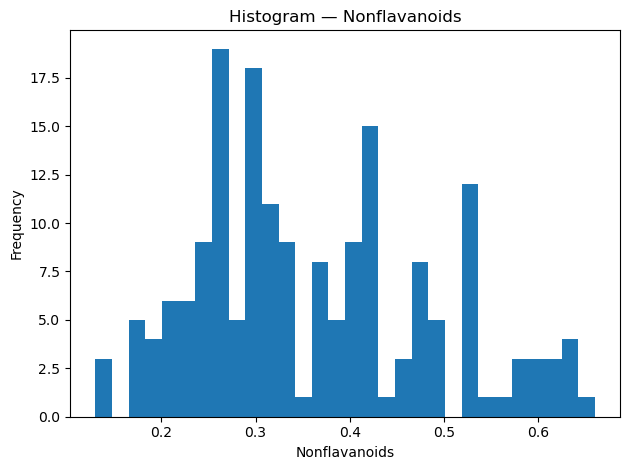

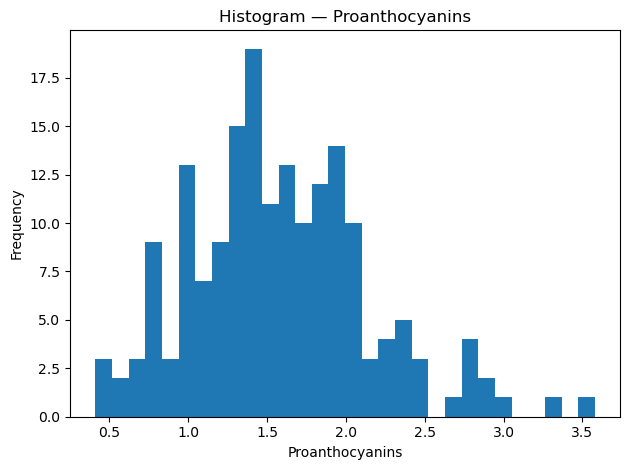

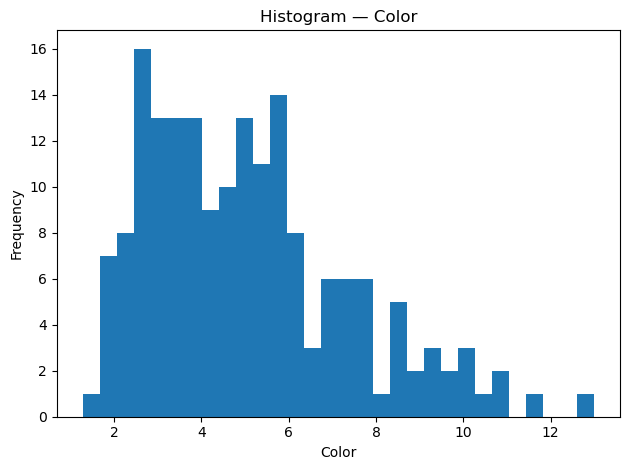

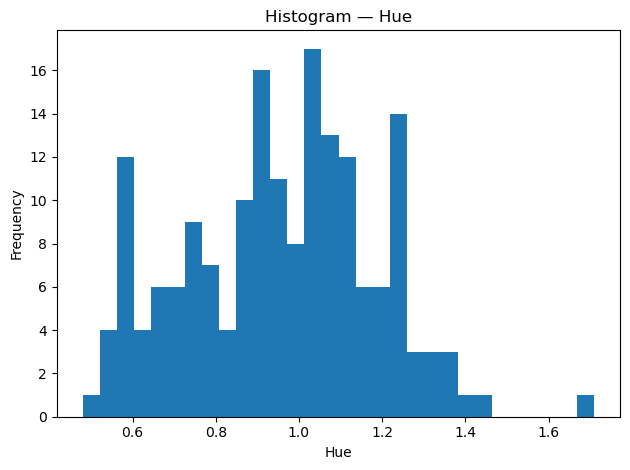

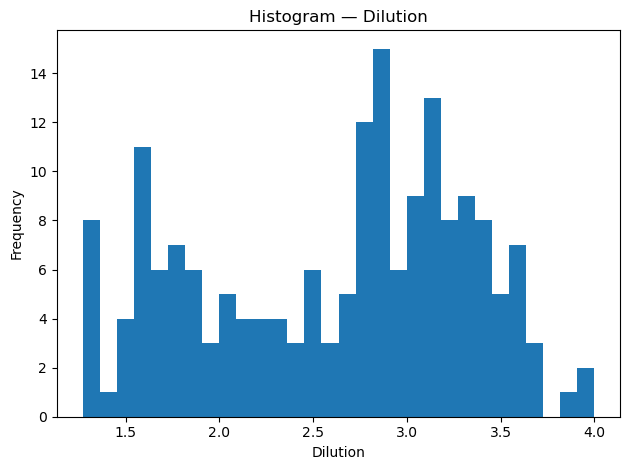

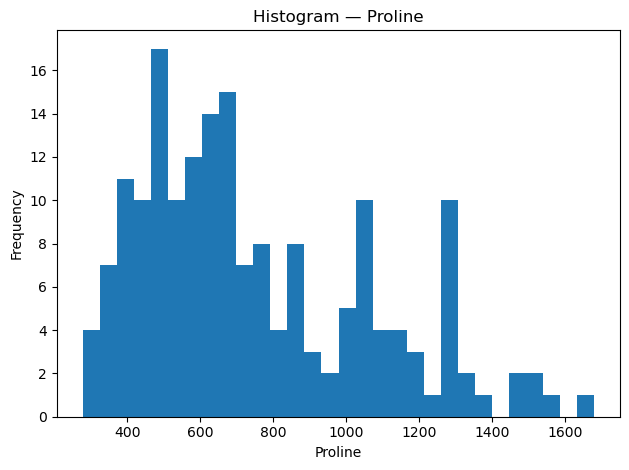

In [50]:
# Histograms
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", numeric_cols)

for col in  numeric_cols:
    plt.figure()
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f"Histogram — {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

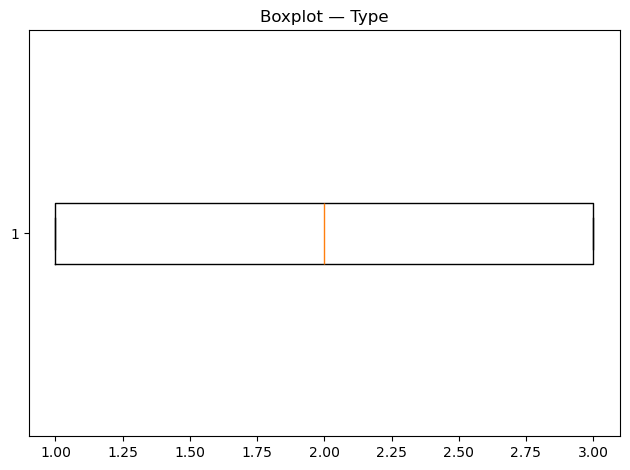

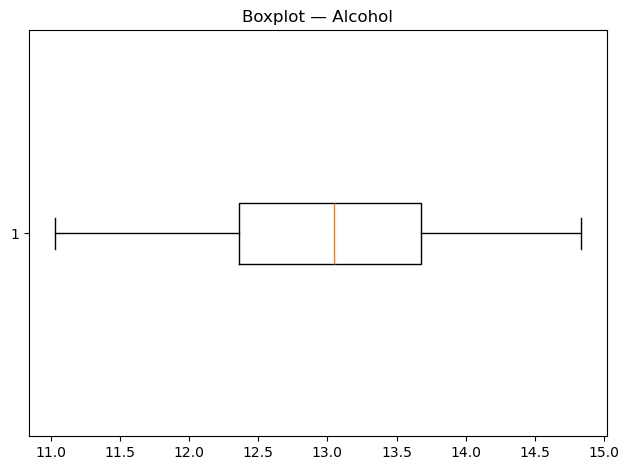

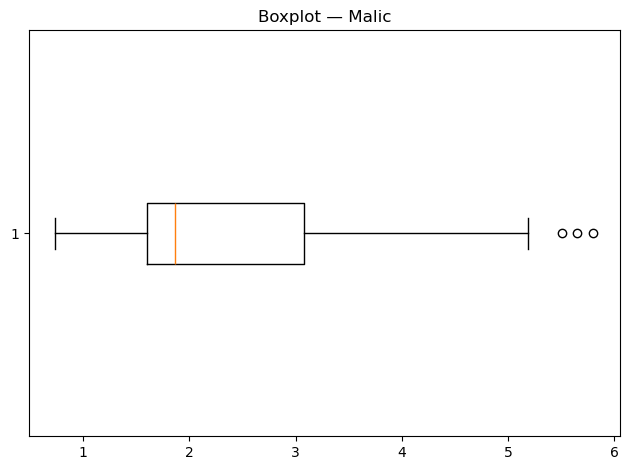

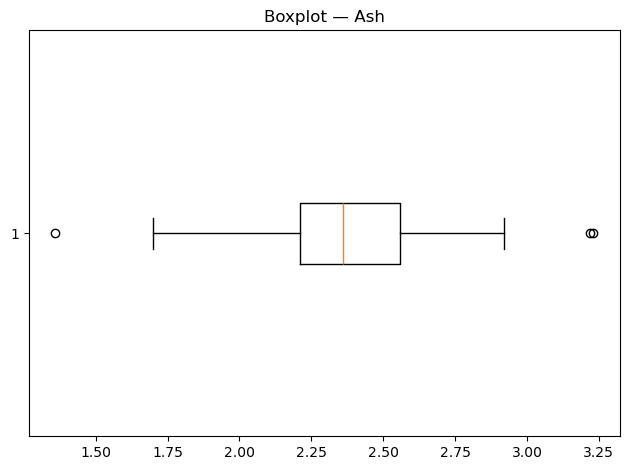

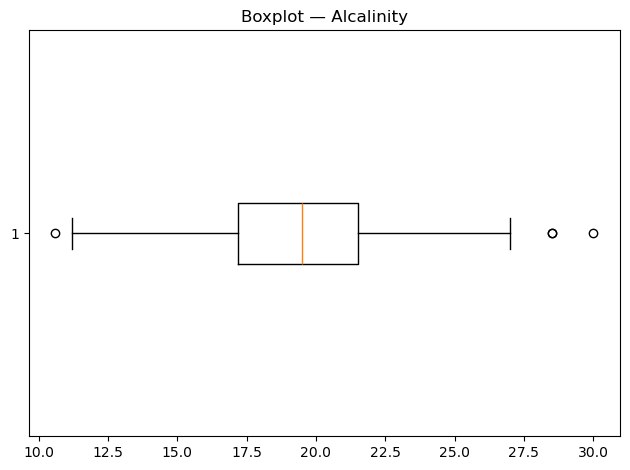

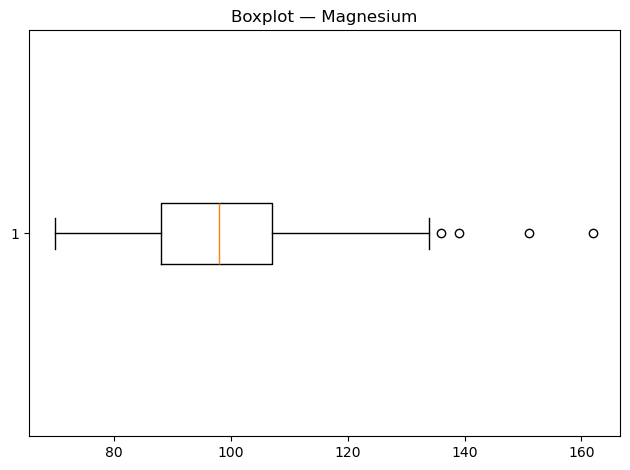

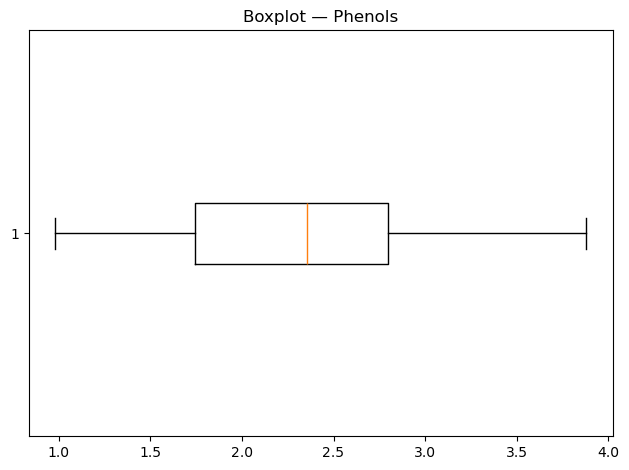

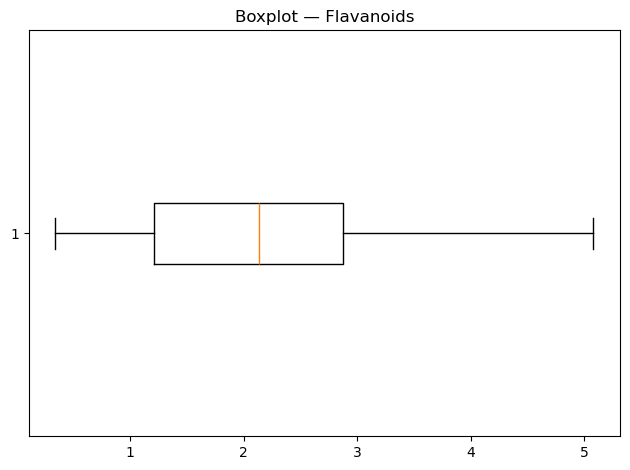

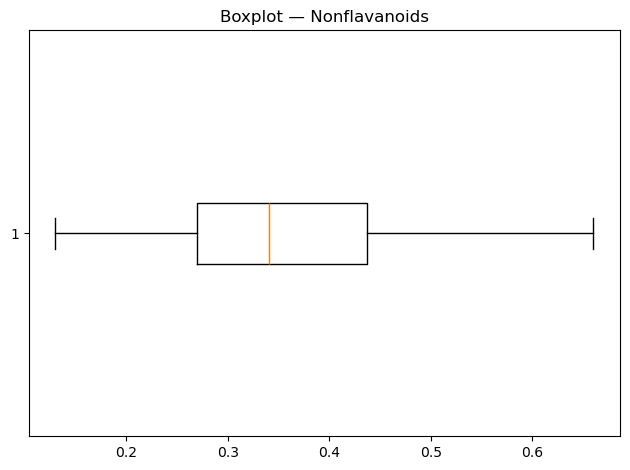

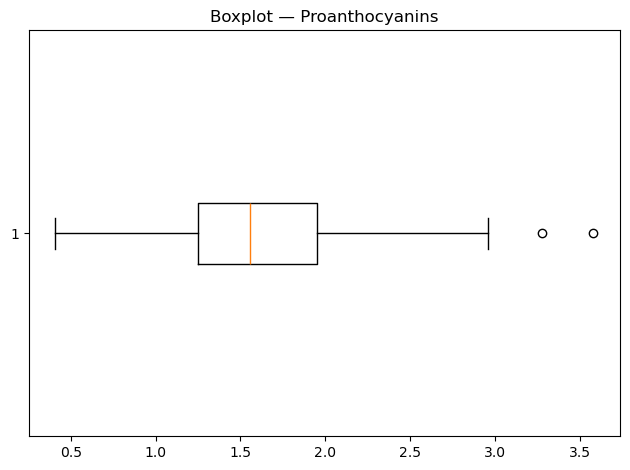

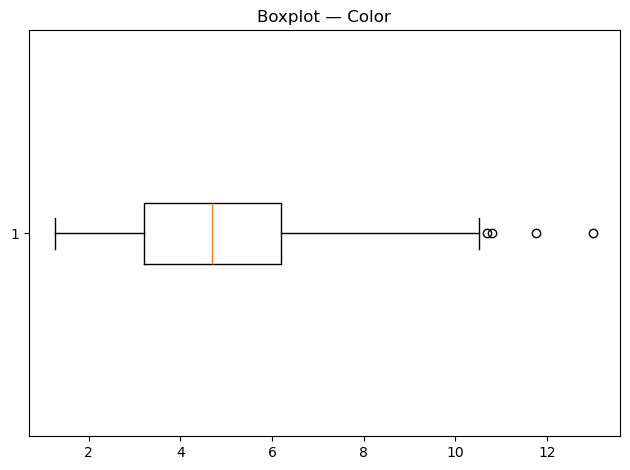

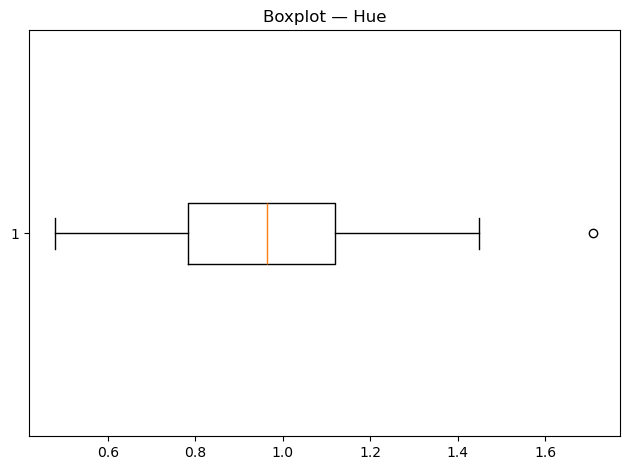

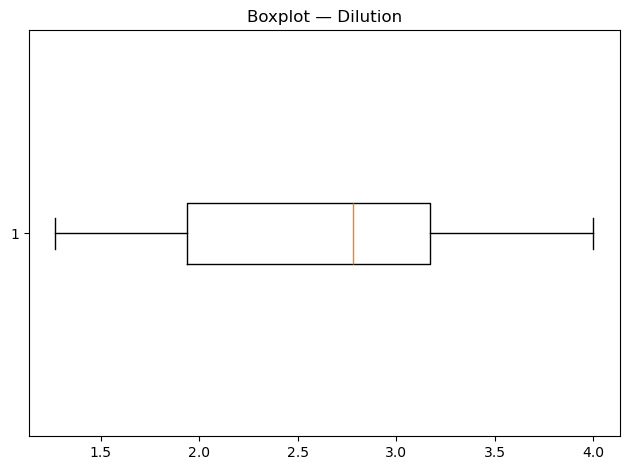

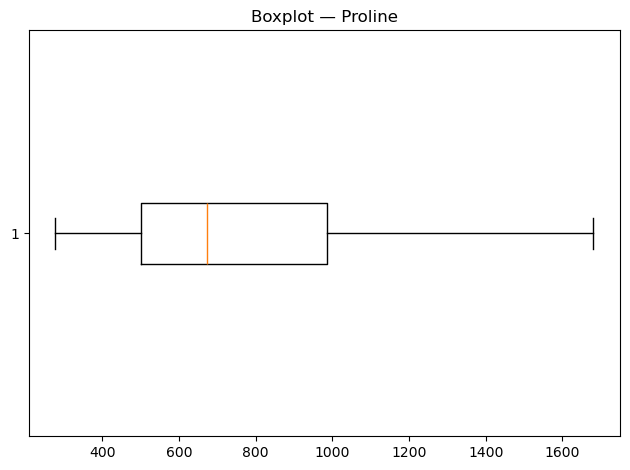

In [51]:
# Boxplots (one per column)
for col in numeric_cols:
    plt.figure()
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f"Boxplot — {col}")
    plt.tight_layout()
    plt.show()

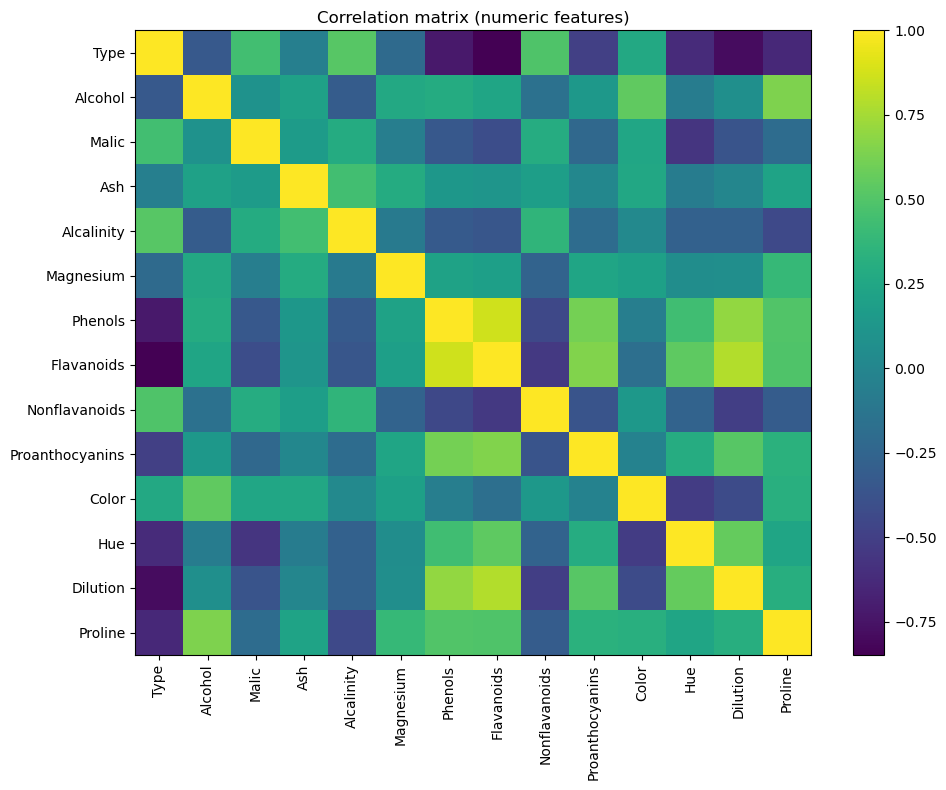

In [52]:
# Cell 5 - Correlation matrix
corr = df[numeric_cols].corr()
plt.figure(figsize=(10,8))
plt.imshow(corr, aspect="auto")
plt.colorbar()
plt.title("Correlation matrix (numeric features)")
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.tight_layout()
plt.show()

In [53]:
corr_pairs = corr.abs().unstack().sort_values(kind="quicksort", ascending=False)
strong_pairs = corr_pairs[corr_pairs < 1.0].drop_duplicates()

In [54]:
print("Top 10 strongest absolute correlations:")
print(strong_pairs.head(10))

Top 10 strongest absolute correlations:
Phenols          Flavanoids    0.864564
Flavanoids       Type          0.847498
Type             Dilution      0.788230
Dilution         Flavanoids    0.787194
Phenols          Type          0.719163
                 Dilution      0.699949
Proanthocyanins  Flavanoids    0.652692
Alcohol          Proline       0.643720
Proline          Type          0.633717
Type             Hue           0.617369
dtype: float64


In [55]:
#Preprocess: impute median for numeric, drop constant cols, scale
X_num = df[numeric_cols].copy()

In [56]:
# Drop columns with zero variance
nunique = X_num.nunique()
const_cols = nunique[nunique <= 1].index.tolist()
if const_cols:
    print("Dropping constant columns:", const_cols)
    X_num = X_num.drop(columns=const_cols)


In [57]:
imputer = SimpleImputer(strategy="median")
X_imputed = pd.DataFrame(imputer.fit_transform(X_num), columns=X_num.columns, index=X_num.index)

In [58]:
# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)   
print("Preprocessing complete. Shape:", X_scaled.shape)

Preprocessing complete. Shape: (178, 14)


In [59]:
# Cell 7 - PCA full-fit for explained variance
pca_full = PCA(n_components=None, random_state=42)
pca_full.fit(X_scaled)
explained = pca_full.explained_variance_ratio_
cum_explained = np.cumsum(explained)

Text(0.5, 1.0, 'Scree plot')

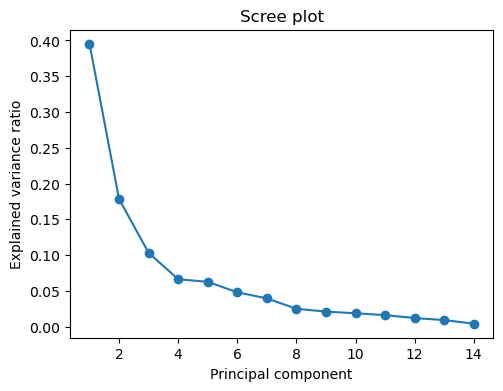

In [60]:
# Scree + cumulative plots
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(range(1, len(explained)+1), explained, marker='o')
plt.xlabel("Principal component")
plt.ylabel("Explained variance ratio")
plt.title("Scree plot")

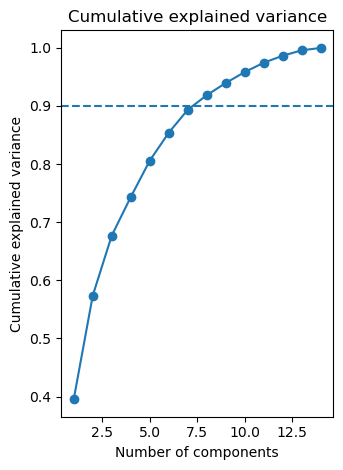

In [61]:
plt.subplot(1,2,2)
plt.plot(range(1, len(cum_explained)+1), cum_explained, marker='o')
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.axhline(0.9, linestyle="--")  # 90% reference
plt.title("Cumulative explained variance")
plt.tight_layout()
plt.show()

In [62]:
threshold = 0.90
if (cum_explained >= threshold).any():
    n_components = int(np.argmax(cum_explained >= threshold)) + 1
else:
    n_components = len(explained)
print(f"Chosen n_components (>= {threshold*100:.0f}% variance):", n_components)

Chosen n_components (>= 90% variance): 8


In [63]:
pca = PCA(n_components=n_components, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print("X_pca shape:", X_pca.shape)

X_pca shape: (178, 8)


In [64]:
# Cell 8 - K range search for original data
K_range = range(2, 11)
inertias = []
sil_scores = []

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

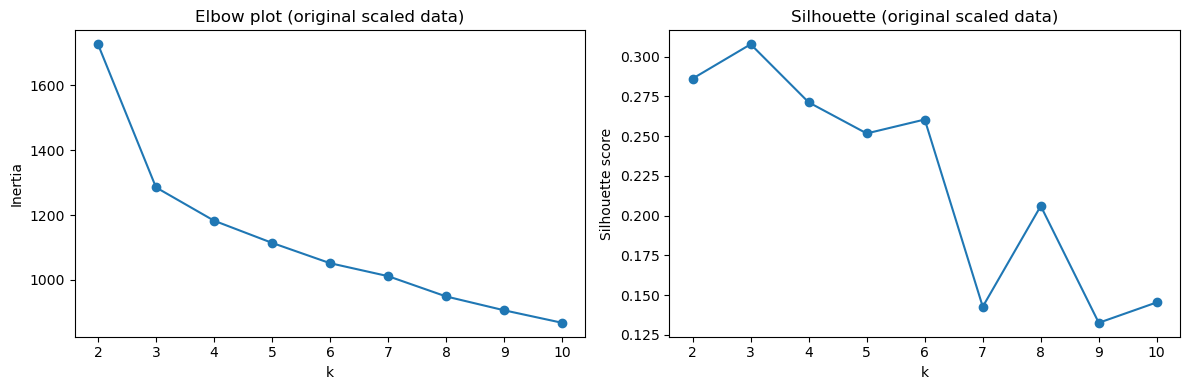

In [65]:
# Plot
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(list(K_range), inertias, marker='o')
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow plot (original scaled data)")

plt.subplot(1,2,2)
plt.plot(list(K_range), sil_scores, marker='o')
plt.xlabel("k")
plt.ylabel("Silhouette score")
plt.title("Silhouette (original scaled data)")
plt.tight_layout()
plt.show()

In [66]:
best_k_orig = K_range[int(np.argmax(sil_scores))]
print("Best k by silhouette (original):", best_k_orig)

# Fit KMeans with chosen k
kmeans_orig = KMeans(n_clusters=best_k_orig, random_state=42, n_init=20)
labels_orig = kmeans_orig.fit_predict(X_scaled)

Best k by silhouette (original): 3


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [67]:
# Cell 9 - K range search for PCA data
inertias_pca = []
sil_scores_pca = []

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_pca)
    inertias_pca.append(km.inertia_)
    sil_scores_pca.append(silhouette_score(X_pca, labels))


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

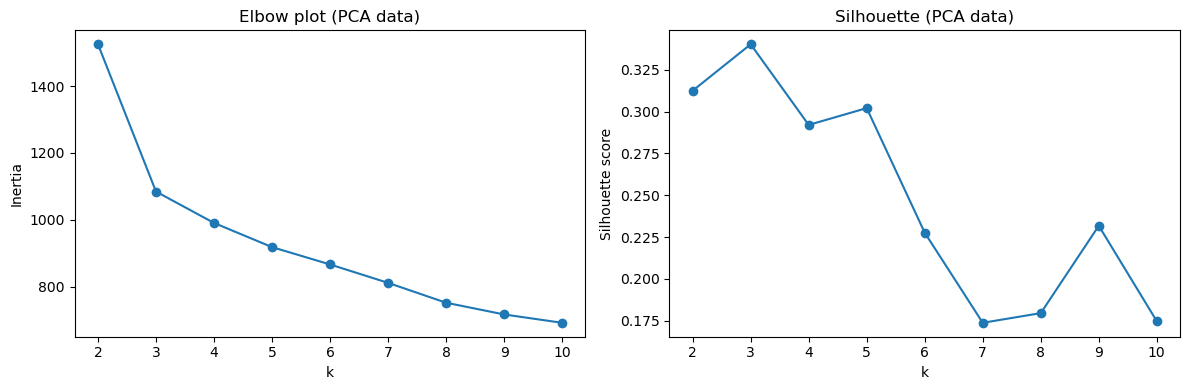

In [68]:
# Plot
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(list(K_range), inertias_pca, marker='o')
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow plot (PCA data)")

plt.subplot(1,2,2)
plt.plot(list(K_range), sil_scores_pca, marker='o')
plt.xlabel("k")
plt.ylabel("Silhouette score")
plt.title("Silhouette (PCA data)")
plt.tight_layout()
plt.show()


In [69]:
best_k_pca = K_range[int(np.argmax(sil_scores_pca))]
print("Best k by silhouette (PCA):", best_k_pca)

kmeans_pca = KMeans(n_clusters=best_k_pca, random_state=42, n_init=20)
labels_pca = kmeans_pca.fit_predict(X_pca)

Best k by silhouette (PCA): 3


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [70]:
# Cell 10 - Evaluation metrics
metrics = {}

metrics['orig_silhouette'] = silhouette_score(X_scaled, labels_orig)
metrics['orig_davies_bouldin'] = davies_bouldin_score(X_scaled, labels_orig)

metrics['pca_silhouette'] = silhouette_score(X_pca, labels_pca)
metrics['pca_davies_bouldin'] = davies_bouldin_score(X_pca, labels_pca)

print("Metrics:")
for k,v in metrics.items():
    print(f" - {k}: {v:.4f}")


Metrics:
 - orig_silhouette: 0.3077
 - orig_davies_bouldin: 1.3164
 - pca_silhouette: 0.3402
 - pca_davies_bouldin: 1.1903


In [71]:
possible_label_cols = [c for c in df.columns if c.lower() in ("class","target","label","y")]
if possible_label_cols:
    true_col = possible_label_cols[0]
    true_labels = df[true_col].values
    print("\nFound ground-truth column:", true_col)
    print("Adjusted Rand Index (orig clusters vs truth):", adjusted_rand_score(true_labels, labels_orig))
    print("Adjusted Rand Index (pca clusters vs truth):", adjusted_rand_score(true_labels, labels_pca))
    print("NMI (orig vs truth):", normalized_mutual_info_score(true_labels, labels_orig))
    print("NMI (pca vs truth):", normalized_mutual_info_score(true_labels, labels_pca))
else:
    print("\nNo obvious ground-truth label column found (skipping ARI/NMI).")


No obvious ground-truth label column found (skipping ARI/NMI).


In [72]:
if X_pca.shape[1] < 2:
    pca_vis = PCA(n_components=2, random_state=42)
    X_vis = pca_vis.fit_transform(X_scaled)
else:
    X_vis = X_pca[:, :2]


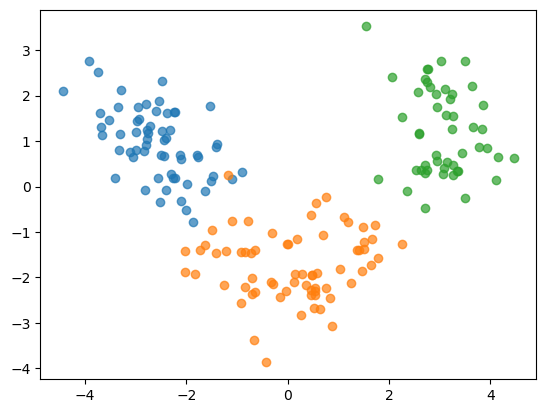

In [75]:
plt.figure()
for lab in np.unique(labels_orig):
    idx = labels_orig == lab
    plt.scatter(X_vis[idx,0], X_vis[idx,1], alpha=0.7)


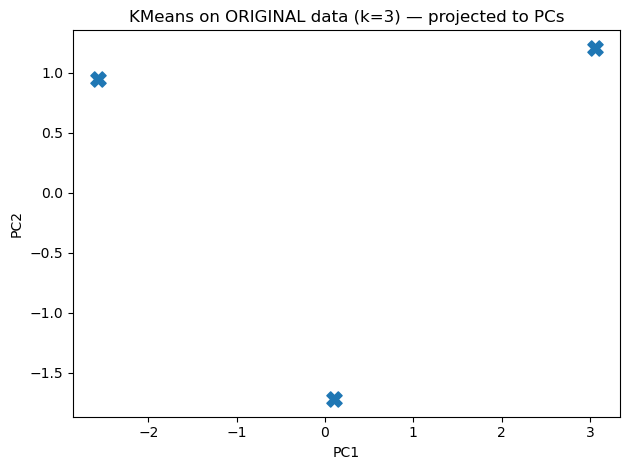

In [76]:
centroids_orig = kmeans_orig.cluster_centers_
if centroids_orig.shape[1] == X_scaled.shape[1]:
    # project centroids to pc-space using pca (we already have pca fitted on X_scaled)
    centroids_proj = pca.transform(centroids_orig)[:, :2] if hasattr(pca, "transform") else None
else:
    centroids_proj = None
if centroids_proj is not None:
    plt.scatter(centroids_proj[:,0], centroids_proj[:,1], marker="X", s=120)
plt.title(f"KMeans on ORIGINAL data (k={best_k_orig}) — projected to PCs")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()

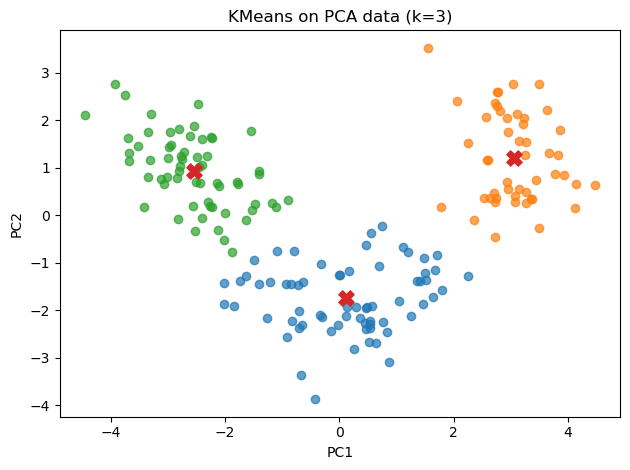

In [77]:
# Plot PCA-data KMeans clusters (in PCA space)
plt.figure()
for lab in np.unique(labels_pca):
    idx = labels_pca == lab
    plt.scatter(X_vis[idx,0], X_vis[idx,1], alpha=0.7)
centroids_pca = kmeans_pca.cluster_centers_
if centroids_pca is not None:
    # centroids are in PCA space already; use first two components
    plt.scatter(centroids_pca[:,0], centroids_pca[:,1], marker="X", s=120)
plt.title(f"KMeans on PCA data (k={best_k_pca})")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()

In [79]:
 
df_result = df.copy().reset_index(drop=True)
df_result["cluster_orig"] = labels_orig
df_result["cluster_pca"] = labels_pca

print("Cluster counts (original clustering):")
print(df_result["cluster_orig"].value_counts().sort_index())
print("\nCluster counts (PCA clustering):")
print(df_result["cluster_pca"].value_counts().sort_index())

# contingency table between the two clusterings
print("\nContingency table between original-clusters and pca-clusters:")
display(pd.crosstab(df_result["cluster_orig"], df_result["cluster_pca"]))

Cluster counts (original clustering):
cluster_orig
0    61
1    68
2    49
Name: count, dtype: int64

Cluster counts (PCA clustering):
cluster_pca
0    67
1    49
2    62
Name: count, dtype: int64

Contingency table between original-clusters and pca-clusters:


cluster_pca,0,1,2
cluster_orig,,,
0,0,0,61
1,67,0,1
2,0,49,0


In [80]:
# Cell 13 - Save outputs
df_result.to_csv("wine_with_clusters.csv", index=False)
dump(scaler, "wine_scaler.joblib")
dump(pca, "wine_pca.joblib")
dump(kmeans_orig, "kmeans_orig.joblib")
dump(kmeans_pca, "kmeans_pca.joblib")
print("Saved: wine_with_clusters.csv, wine_scaler.joblib, wine_pca.joblib, kmeans_orig.joblib, kmeans_pca.joblib")

Saved: wine_with_clusters.csv, wine_scaler.joblib, wine_pca.joblib, kmeans_orig.joblib, kmeans_pca.joblib


In [81]:
# Cell 14 - Auto-generate a short conclusion template
print("CONCLUSION TEMPLATE (edit as needed):\n")
print(" - Dataset shape:", df.shape)
print(f" - PCA used {n_components} components covering >= {threshold*100:.0f}% variance.")
print(" - Best k (original scaled data):", best_k_orig)
print(" - Best k (PCA data):", best_k_pca)
print(" - Silhouette (original):", metrics['orig_silhouette'])
print(" - Silhouette (pca):", metrics['pca_silhouette'])
print("\nRecommendations:")
print(" - If PCA clustering yields similar/higher silhouette and simpler clusters, prefer PCA-reduced space for clustering.")
print(" - If cluster interpretability in the original feature-space is important, profile cluster centers on original (pre-scaled) features.")

CONCLUSION TEMPLATE (edit as needed):

 - Dataset shape: (178, 14)
 - PCA used 8 components covering >= 90% variance.
 - Best k (original scaled data): 3
 - Best k (PCA data): 3
 - Silhouette (original): 0.30773604383565206
 - Silhouette (pca): 0.3402428666857788

Recommendations:
 - If PCA clustering yields similar/higher silhouette and simpler clusters, prefer PCA-reduced space for clustering.
 - If cluster interpretability in the original feature-space is important, profile cluster centers on original (pre-scaled) features.
